In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = [15.50, 10.50]
plt.rcParams["figure.autolayout"] = True

In [3]:
df=pd.read_excel('AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [4]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
df.duplicated().sum()

0

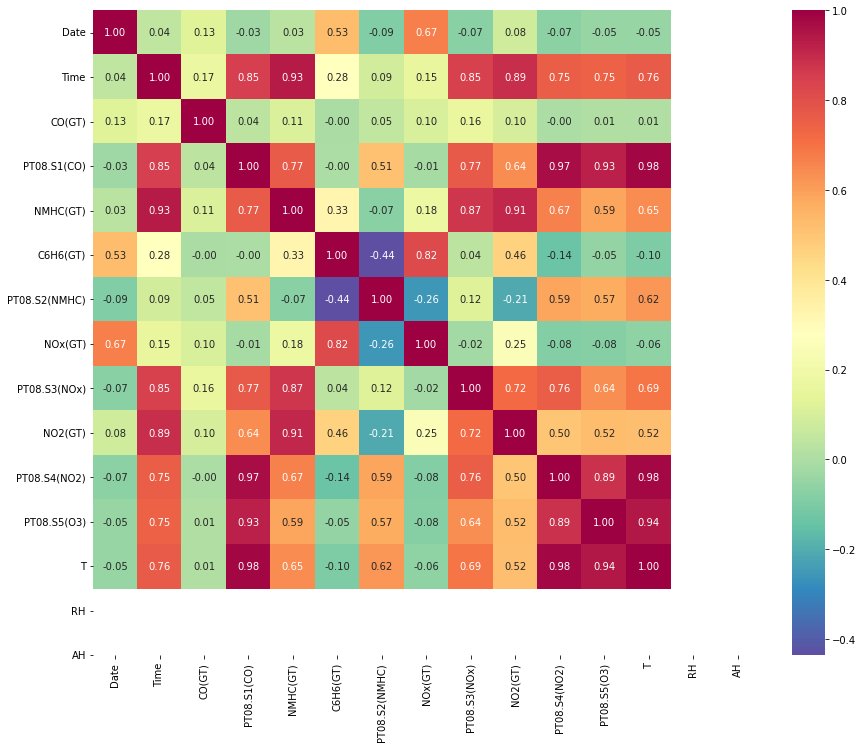

In [27]:
corrmat = df.corr()
hm = sns.heatmap(corrmat,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=df.columns,xticklabels=df.columns,cmap="Spectral_r")
plt.show()

In [7]:
df['Date']=df['Date'].dt.month
df['Time']=df['Time'].apply(lambda x: int(x.strftime('%H')))
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,18,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,3,19,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,3,20,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,3,21,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,3,22,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4,10,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,4,11,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,4,12,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,4,13,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [42]:
arr = df.to_numpy()
X = arr[:, 0:13]
Y = arr[:,13]
X

array([[   3.        ,   18.        ,    2.6       , ..., 1692.        ,
        1267.5       ,   13.5999999 ],
       [   3.        ,   19.        ,    2.        , ..., 1558.75      ,
         972.25      ,   13.29999995],
       [   3.        ,   20.        ,    2.2       , ..., 1554.5       ,
        1074.        ,   11.9000001 ],
       ...,
       [   4.        ,   12.        ,    2.4       , ..., 1240.75      ,
        1092.        ,   26.89999962],
       [   4.        ,   13.        ,    2.1       , ..., 1041.        ,
         769.75      ,   28.32499981],
       [   4.        ,   14.        ,    2.2       , ..., 1128.5       ,
         816.        ,   28.50000048]])

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [43]:
def costFun(theta, X_train, Y_train):
    m = len(X_train)
    mat = np.dot(X_train, theta) 
    mat = np.subtract(mat,Y_train)
    J = np.dot(np.transpose(mat), mat)
    J /= (2*m)
    return J

def diffCostFun(theta, X_train, Y_train):
     mat = np.dot(X_train, theta) 
     mat = np.subtract(mat,Y_train)
     grad=np.dot(mat,X_train)
     return grad 

def fitGD(X_train, Y_train, alpha, lam, TypeofRegularization, NumberofIterations) :
    j_theta = np.array([])
    itr =np.array([])
    m=X_train.shape[0]
    X_train=np.append(X_train,np.ones((m,1)),axis=1)
    if TypeofRegularization==1 :
        theta=np.zeros((14,1))
        for i in range(NumberofIterations):
            theta =theta + -1*alpha*(diffCostFun(theta,X_train,Y_train)+lam/(2*len(np.ravel(X_train))))
            itr = np.append(itr,i)
            j_theta = np.append(j_theta,theta)
    elif TypeofRegularization==2 :
        theta=np.zeros((14,1))
        for i in range(NumberofIterations):
            theta = theta+ -1*alpha*(diffCostFun(theta,X_train,Y_train)+theta*lam/(len(np.ravel(X_train))))
            itr = np.append(itr,i)
            j_theta = np.append(j_theta,theta)
    elif TypeofRegularization==3 :
        theta=np.zeros((14,1))
        for i in range(NumberofIterations):
            theta =theta+ -1*alpha*(diffCostFun(theta,X_train,Y_train)+0.5*theta*lam/(len(np.ravel(X_train)))+0.5*lam/(2*len(np.ravel(X_train))))
            itr = np.append(itr,i)
            j_theta = np.append(j_theta,theta)
    return theta



In [40]:
def fitNormal(X_train,Y_train):
  m=X_train.shape[0]
  X_train=np.append(X_train,np.ones((m,1)),axis=1)
  Y_train=Y_train.reshape(m,1)
  theta=np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,Y_train))
  return theta

<function matplotlib.pyplot.show(*args, **kw)>

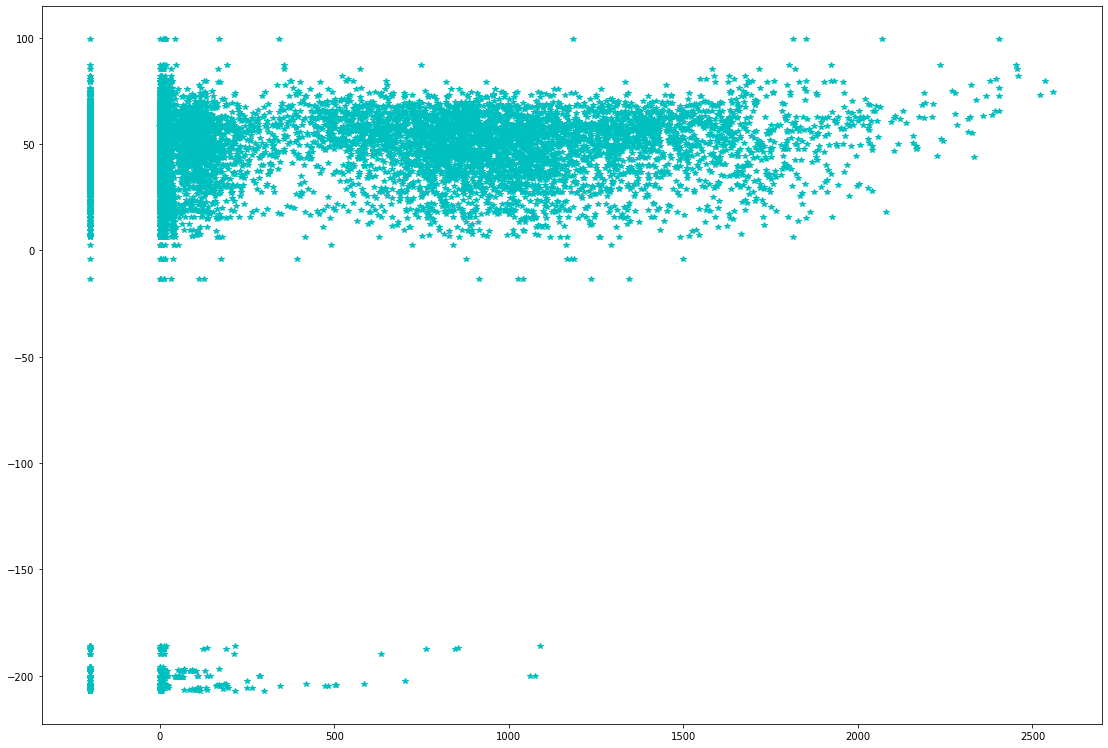

In [45]:
m=X_test.shape[0]
X_test=np.append(X_test,np.ones((m,1)),axis=1)
preds=np.dot(X_test,fitNormal(X_train,Y_train))
plt.plot(X_test,preds,'c*')
plt.show